In [8]:
from keras.applications import VGG16
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

In [11]:
train_dir = '/content/drive/MyDrive/cats_and_dogs_small/train'
validation_dir = '/content/drive/MyDrive/cats_and_dogs_small/validation'
test_dir = "/content/drive/MyDrive/cats_and_dogs_small/test"

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150),
                                                      batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Construct Classifier

In [12]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Freeze convolutional base

In [13]:
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer == 'blck5_convl':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',
              metrics = ['acc'])
history = model.fit(train_generator, steps_per_epoch=100,
                    epochs=100,
                    validation_data=(validation_generator), validation_steps=50)

Epoch 1/100
100/100 [==============================] - 495s 5s/step - loss: 0.6271 - acc: 0.6570 - val_loss: 0.4566 - val_acc: 0.8300
Epoch 2/100
100/100 [==============================] - 29s 294ms/step - loss: 0.4948 - acc: 0.7850 - val_loss: 0.3795 - val_acc: 0.8530
Epoch 3/100
100/100 [==============================] - 30s 297ms/step - loss: 0.4373 - acc: 0.8155 - val_loss: 0.3341 - val_acc: 0.8660
Epoch 4/100
100/100 [==============================] - 30s 296ms/step - loss: 0.4174 - acc: 0.8175 - val_loss: 0.3073 - val_acc: 0.8820
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.3959 - acc: 0.8250 - val_loss: 0.2905 - val_acc: 0.8880
Epoch 6/100
100/100 [==============================] - 30s 300ms/step - loss: 0.3735 - acc: 0.8345 - val_loss: 0.2794 - val_acc: 0.8940
Epoch 7/100
100/100 [==============================] - 29s 288ms/step - loss: 0.3633 - acc: 0.8450 - val_loss: 0.2718 - val_acc: 0.8910
Epoch 8/100
100/100 [=============================

In [17]:
def smooth_curve(points, factor = 0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

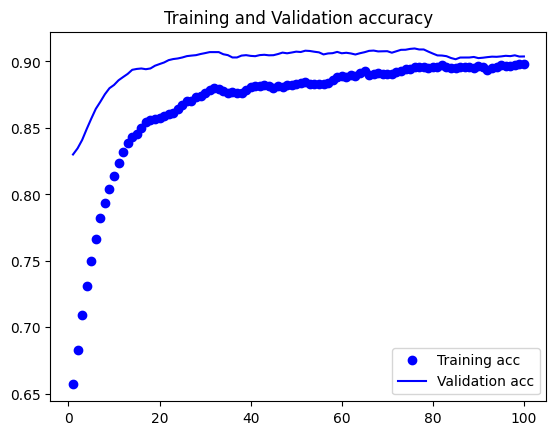

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, smooth_curve(acc), 'bo', label = "Training acc")
plt.plot(epochs, smooth_curve(val_acc), 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

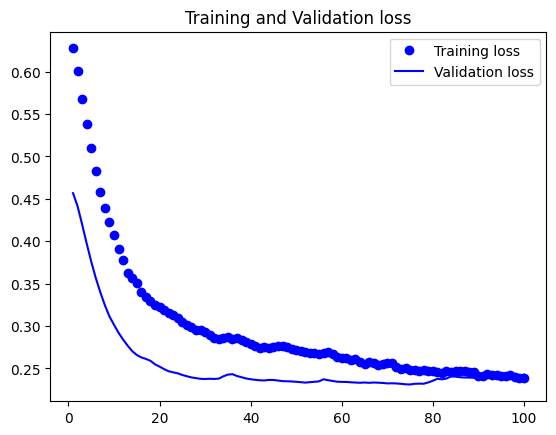

In [19]:
plt.plot(epochs, smooth_curve(loss), 'bo', label = "Training loss")
plt.plot(epochs, smooth_curve(val_loss), 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [20]:
model.save('pre_aug_FT_cats_and_dogs.keras')